In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

# Self driving car model analysis

The purpose of this analysis is try to explain the train and test proceses. Analysing data and augmentation this to improve accurary and later simulation over udacity simulator.

Without further ado, let's start with the step-by-step process:

**Step 1**: Let's import required classes & functions:

In [5]:
import os
from IPython.display import Image

from lib.config import Config
from lib.dataset_loader import DatasetLoader
from lib.model_factory import ModelFactory

from keras import backend as K

**Step 2**: First of all check that has a GPU available. This is required to decrease learning training times: 

In [6]:
print("Available GPU's: ", K.tensorflow_backend._get_available_gpus())

Available GPU's:  ['/job:localhost/replica:0/task:0/device:GPU:0']


**Step 3**: Load config file.

In [7]:
cfg = Config('./config.yml')

### Load Train data

The dataset was previously generater using de "Training Mode" of UDacity simulator. This mode generate:

1. **IMG** directory that contain images taked with all cameras(left, center, right)

2. **driving_log.csv** file that contain examples with next columns:

In [24]:
cfg['dataset']['columns']

['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']

When:
* center, left and right are images paths.
* steering: Steering whell angle.
* throttle: Card aceletation.
* Reverse
* Speed

**Step 1**: Load dataset

In [8]:
loader = DatasetLoader(cfg)

dataset = loader.load(
    features=cfg['dataset']['features'],
    labels=cfg['dataset']['labels']
)

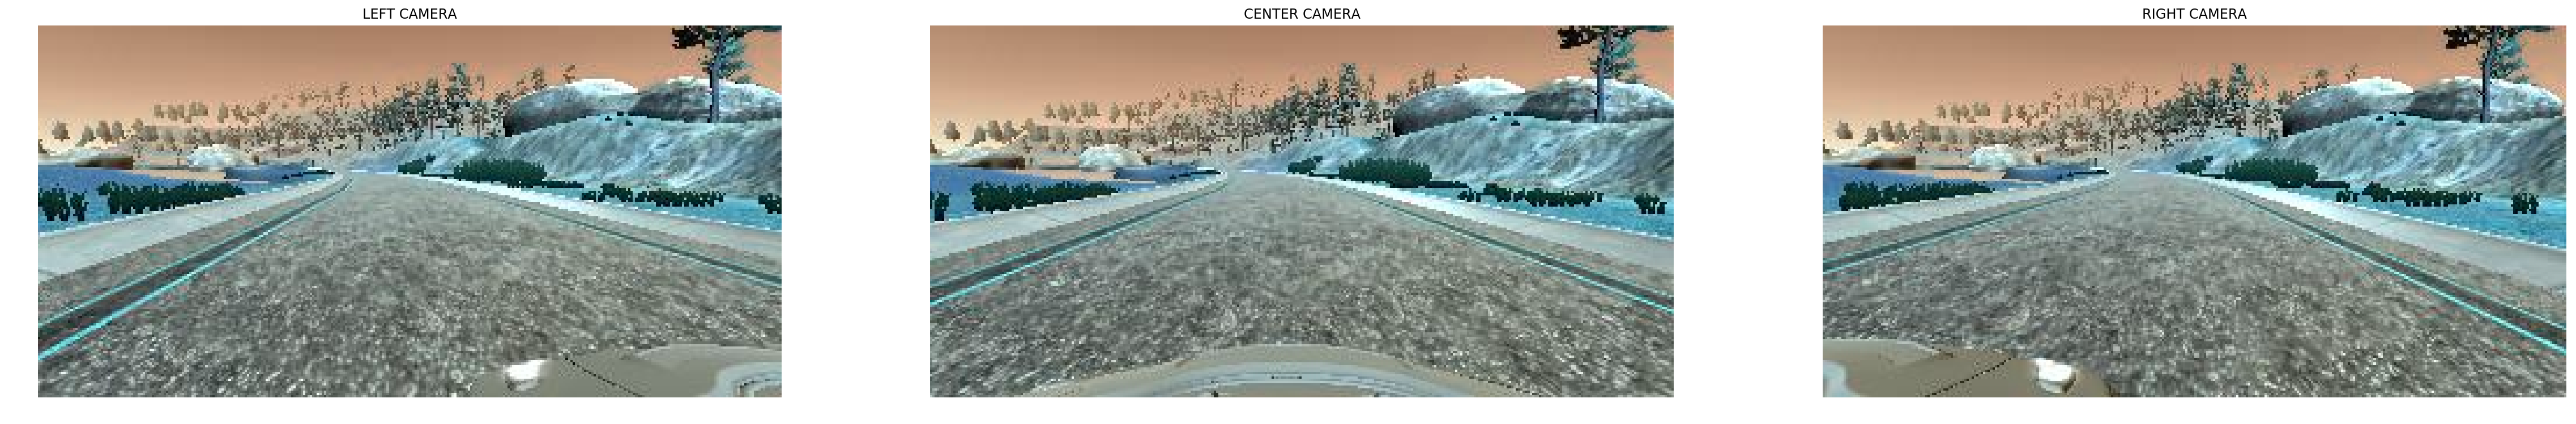

Steering Angle:  0.0


In [9]:
example = dataset[0]
example.show()

**Step 2**: Split dataset in train and validation.

In [10]:
train_dataset, validation_dataset = dataset.split(percent=cfg['train']['validation_set_percent'])

In [11]:
print("Train dataset examples: ", len(train_dataset))

Train dataset examples:  651


In [12]:
print("Validation dataset examples: ", len(validation_dataset))

Validation dataset examples:  163


### Create NVidia model

**Step 1:** Define magic lambda that used to normalize images to avoid saturation and make gradients work better.

In [13]:
input_normalization=lambda x: x / 127.5 - 1.0

**Step 2:** Next let's define the input shape given three parameters:

In [14]:
image_height = cfg['dataset']['image']['height']
print('Input Image Height: ', image_height)

Input Image Height:  160


In [15]:
image_width = cfg['dataset']['image']['width']
print('Input Image Width: ', image_width)

Input Image Width:  320


The image channels refers to RGB color notation (red, green, blue):

In [16]:
image_channels = cfg['dataset']['image']['channels']
print('Input Image Channels: ', image_channels)

Input Image Channels:  3


Then define input shape:

Then an input shape is a tensor (a list of matrixes) of range 3:

In [19]:
input_shape=(image_height, image_width, image_channels)
input_shape

(160, 320, 3)

**Step 3:** Next define 50% dropout after las CNN layer <a href='#Dropout'>[1]</a>:

In [20]:
cnn_end_dropout_rate=0.5

**Step 4:** Also use an activation function ELU <a href='#Activation-Functions'>[2]</a>:

In [21]:
activation='elu'

**Step 5:** Create the model.




MODEL SUMMARY

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 160, 320, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 78, 158, 24)       1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 77, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 17, 37, 48)        43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 35, 64)        27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 33, 64)        36928     
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 33, 64)        0  

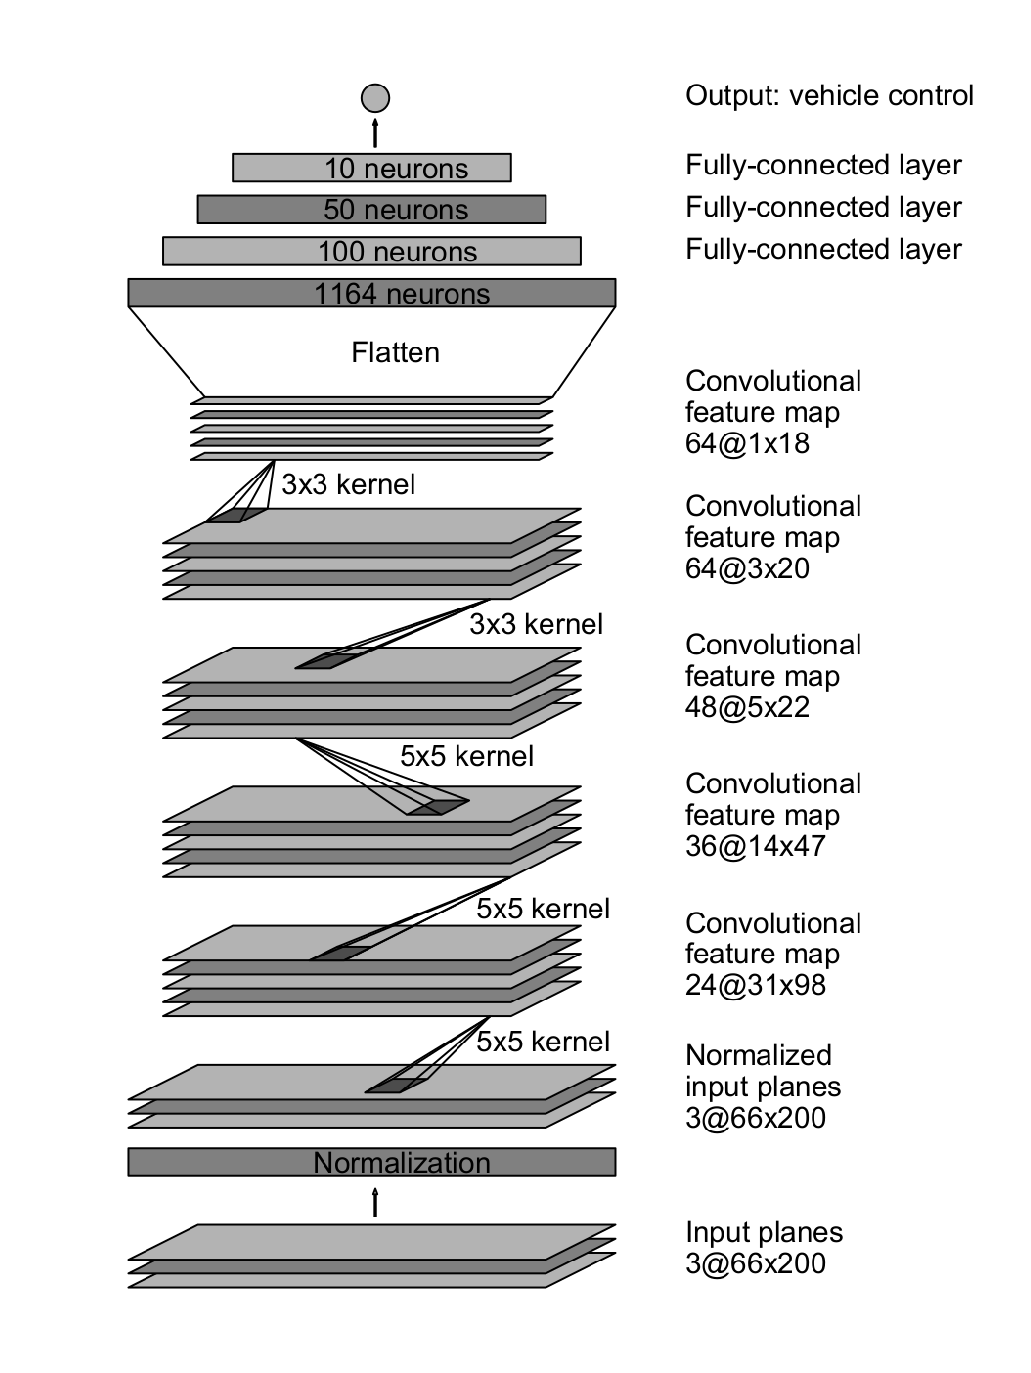

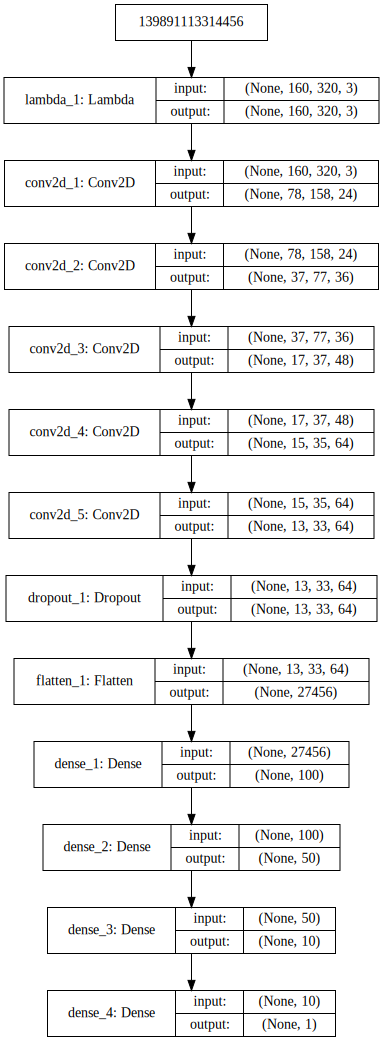

In [22]:
model = ModelFactory.create_nvidia_model(
    input_shape,
    input_normalization,
    cnn_end_dropout_rate,
    activation
)
model.show()

### Create data generators

### References

##### Dropout

* [Dropout](https://youtu.be/Ty6K6YiGdBs)
* [Dropout RENDER](https://youtu.be/6DcImJS8uV8)
* [Dropout Pt. 2 RENDER](https://youtu.be/8nG8zzJMbZw)

##### Activation Functions

* [Introduction to Exponential Linear Unit](https://medium.com/@krishnakalyan3/introduction-to-exponential-linear-unit-d3e2904b366c)
* [Which Activation Function Should I Use?](https://youtu.be/-7scQpJT7uo)